# Torsional Oscillator Experiments 
## Josh Berg and Aaron Titus, High Point University

### Experiment 1.5:  From position and velocity to energy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt #used for graphing
from scipy.optimize import curve_fit

In [2]:
#show graphs inline (do not use for print publication quality graphs)
%matplotlib inline

In this section we use the voltages of angular position, θ(t), and the angular velocity, [dθ/dt]/(t) to calculate the elastic potential energy as well as kinetic energy. 

Elastic Potential Energy (fully twisted): 

$$U = \frac{1}{2}\kappa\theta^2$$
    
Kinetic Energy (pasing back through equilibrium):           
$$K = \frac{1}{2}I\left(\frac{d\theta}{dt}\right)^2$$

    
By plotting the time dependence of U(t) and K(t) it is seen that the functions have two maxima per cycle of oscillation. Additionally, it is possible to plot mechanical energy of the system as a function of time. This is a constant for an undamped oscillation. 

Mechanical Energy:        
$$E = K(t) + U(t)$$
    
Contrarily, in a damped oscillator scenario, mechanical energy is not expected to be conserved. 

##### Only the logger pro curve fit averages from experiment 1.4 were used 

### Trial 1

In [4]:
k = 0.06385867412571428 #torsion constant - found in experiment 1.3 (N*m/rad)
#k=0.058736556711599996 #ave torsion constant from experiment 1.1 (N m/rad)
I_zero = 0.00214563447013 #rotational inertia of the system (without any brass bars) (kg*m^2)
m_theta = 0.692376175402 # rad/V
b_theta = 0.167715119623 # rad
m_omega = 27.411632 # (rad/s)/V
b_omega = 0.393125 # rad/s

In [5]:
# Read data file and define dataframe object (df for dataframe)
df_all = pd.read_table('Experiment1_5new-1.txt')

In [6]:
#print first five rows of data with the header
df_all.head(10)

,t (s),V_theta (V),V_omega (V)
0,0.00,0.740433,-0.029373
1,0.02,0.719452,-0.041389
2,0.04,0.689125,-0.056648
3,0.06,0.661850,-0.059509
4,0.08,0.619698,-0.077629
5,0.10,0.568199,-0.077629
6,0.12,0.507736,-0.086784
7,0.14,0.456429,-0.083733
8,0.16,0.389862,-0.107956
9,0.18,0.326538,-0.107956


In [7]:
Time = np.array(df_all['t (s)'].tolist())
V_theta = np.array(df_all['V_theta (V)'].tolist())
V_omega = np.array(df_all['V_omega (V)'].tolist())
Theta = m_theta*V_theta + b_theta #rad
Omega = m_omega*V_omega + b_omega # (rad/s)

Theta_0 = np.mean(Theta) 
Theta = Theta - Theta_0

In [8]:
#Elastic Potential Energy 
U = (1/2)*k*(np.square(Theta))

#Kinetic Energy 
K = (1/2)*I_zero*(np.square(Omega))

#Total Energy 
E = U + K 

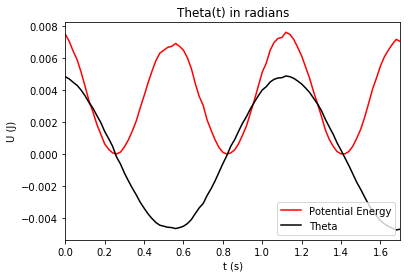

In [9]:
#plot graph
fig2 = plt.figure()
plt.title('Theta(t) in radians')
plt.xlabel('t (s)')
plt.ylabel('U (J)')
plt.plot(Time,U,'r-',label='Potential Energy')
plt.plot(Time,Theta/100,'k-',label='Theta')
plt.legend(loc='best')
plt.xlim([0,1.70])
plt.show()

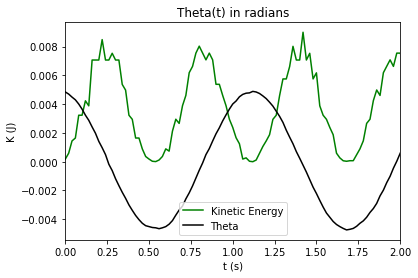

In [9]:
#plot graph
fig2 = plt.figure()
plt.title('Theta(t) in radians')
plt.xlabel('t (s)')
plt.ylabel('K (J)')
plt.plot(Time,K,'g-',label='Kinetic Energy')
plt.plot(Time,Theta/100,'k-',label='Theta')
plt.legend(loc='best')
plt.xlim([0,2])
plt.show()

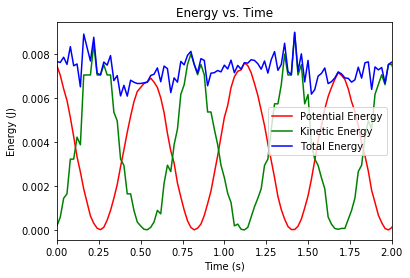

In [10]:
#plot graph
fig2 = plt.figure()
plt.title('Energy vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.plot(Time,U,'r-',label='Potential Energy')
plt.plot(Time,K,'g-',label ='Kinetic Energy')
plt.plot(Time,E,'b-', label='Total Energy')
plt.legend(loc='best')
plt.xlim([0,2])
plt.show()

In [14]:
new_E = np.absolute(E)

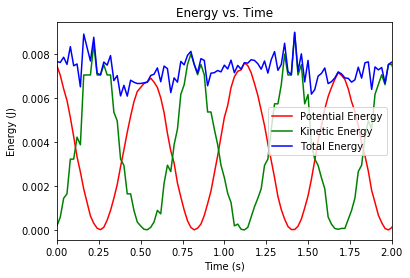

In [15]:
#plot graph
fig2 = plt.figure()
plt.title('Energy vs. Time')
plt.xlabel('Time (s)')
plt.ylabel('Energy (J)')
plt.plot(Time,U,'r-',label='Potential Energy')
plt.plot(Time,K,'g-',label ='Kinetic Energy')
plt.plot(Time,new_E,'b-', label='Total Energy')
plt.legend(loc='best')
plt.xlim([0,2])
plt.show()